In [1]:
from textblob import TextBlob

In [2]:
import tweepy

In [3]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
consumer_key=""
consumer_secret=""
access_token="O"
access_secret=""

In [5]:

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [6]:
api=tweepy.API(auth)

In [7]:
api

In [8]:
search_term="Trump"
no_of_tweets=1000
twitter=tweepy.Cursor(api.search,q=search_term).items(no_of_tweets)

In [9]:
a="hi i m a good player"
b="football sucks yo !never playing"
c="i think football is not bad"
TextBlob(c).sentiment

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)

In [10]:
positive=0 
neg=0
pol=0
neutral=0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [11]:
for tweet in twitter:
    analysis=TextBlob(tweet.text)
    
    pol+=analysis.sentiment.polarity
    if (analysis.sentiment.polarity==0):
        neutral +=1
        neutral_list.append(tweet.text)
    elif (analysis.sentiment.polarity>0.00): 
        positive +=1
        positive_list.append(tweet.text)
    elif (analysis.sentiment.polarity<0.00):   
        neg +=1
        negative_list.append(tweet.text)

In [13]:
import nltk
import re
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
column=['review']
positive_list.columns=column
positive_list.head()
positive_list['review'][0]

'RT @Hasyr84: Benjamin Netanyahu scripted this whole thing, he invaded Muslim’s 3rd holiest site on the holiest night of the year. He did th…'

In [26]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('rt')
stopwords.append('rbreich')
stopwords.append('https')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from string import punctuation
corpus=[]
for i in range(len(positive_list)):
    review=positive_list['review'][i]
    review=review.lower()
    review=review.split()
    preview=[]
    for word in review:
        if word not in stopwords and word not in punctuation:
            preview.append(word)
    ps=PorterStemmer()   
    review=[word for word in preview]
    review=" ".join(review)
    corpus.append(review)
df=pd.DataFrame(corpus)
column=['tweet']
df.columns=column
df.head()

,tweet
0,@hasyr84: benjamin netanyahu scripted whole th...
1,@markmeadows: new customs border protection nu...
2,"@newsmax: .@kimguilfoyle: ""a republican perhap..."
3,@funder: students trump founder sentenced year...
4,@nothoodlum: appropriate ‘students trump’ foun...


([<matplotlib.patches.Wedge at 0x25bedf54460>,
 [Text(-0.7802571711682955, 0.775370070895472, ''),
  Text(-0.9324457786483817, -0.5835622245149298, ''),
  Text(1.071199236361342, -0.2500643837472224, '')])

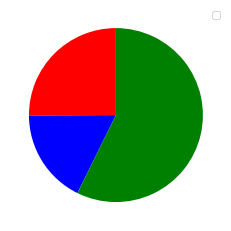

In [70]:
labels=['pos ','neg','neutral']
sizes=[positive,neg,neutral]
color=['red','blue','green']
labels = ['pos','neutral','neg']

plt.legend( labels, loc="best")
plt.pie(sizes,colors=color,startangle=90)

In [28]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


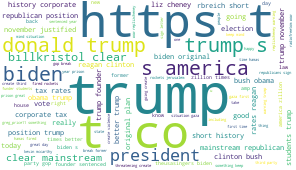

In [29]:
create_wordcloud(df['tweet'].values)